## Bi-LSTM TF-IDF

Dataset : https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data

# Kredential Akun Kaggle

In [ ]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset

In [ ]:
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 93% 49.0M/52.6M [00:02<00:00, 34.7MB/s]
100% 52.6M/52.6M [00:02<00:00, 26.7MB/s]


# Unzip

In [ ]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/jigsaw-toxic-comment-classification-challenge.zip

Archive:  /content/jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


# No. 1 

Setelah berhasil melakukan download dataset. Inputkan path kedalam code berikut.
- train untuk data train
- test untuk data test
- subm untuk data sample_submission

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.utils import shuffle
train = pd.read_csv('/content/train.csv.zip')
test = pd.read_csv('/content/test.csv.zip')
subm = pd.read_csv('/content/sample_submission.csv.zip')

# No. 2

Tampilkan lima data teratas dan terbawah dari data train

In [ ]:
train.head().append(train.tail())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
import datetime
name = 'Budi'
age = 20
anniversary = datetime.date(2001, 10, 12)
f'My name is {name}, my age next year is {age+1}, my anniversary is {anniversary:%A, %B %d, %Y}.'

'My name is Budi, my age next year is 21, my anniversary is Friday, October 12, 2001.'

# No. 3

Masukkan label cols : toxic, severe toxic, obscene, threat, insult, identity hate

In [ ]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
num_classes = len(label_cols) 
y_train = train[label_cols].values
print(num_classes)

6


# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=200,tokenizer=tokenize,sublinear_tf=True, min_df=1, norm='l2', encoding='utf-8', lowercase=False , ngram_range=(1, 2), stop_words='english')

X_train = tfidf.fit_transform(train[COMMENT]).toarray()
X_test = tfidf.transform(test[COMMENT])

# Implementasi Deep Learning

In [ ]:
from keras import utils
from keras.layers import Dense, LSTM, Embedding, Flatten, Dropout, ActivityRegularization,Activation
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras import optimizers
from collections import defaultdict
import gzip
import itertools

In [ ]:
import os
from keras.layers import Input,Bidirectional,Activation,Conv1D,GRU
from keras.callbacks import Callback
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.preprocessing import text, sequence
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Bangun Model Keras

# No. 4

Inputkan berikut pada model compile
loss = binary crossentropy
optimizer = adam
metrics = acc

In [ ]:
def build_model(X_train,num_classes):
    model = Sequential()
    model.add(Dense(64,input_shape=(X_train.shape[1],)))   
    model.add(Activation('relu'))
    model.add(BatchNormalization())
#    model.add(Flatten())
#    model.add(Bidirectional(LSTM(64, return_sequences=True)))
#    model.add(Activation('relu'))
#    model.add(BatchNormalization())
    model.add(Dense(128))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
#    model.add(GlobalMaxPooling1D())
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
    return model

# Model Summary

# No. 5 Buatlah model summary nya

In [ ]:
modelDL = build_model(X_train,num_classes)
modelDL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12864     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                        

In [ ]:
# From Deep Learning with Python book
def make_history_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b-', color='green',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b-', color='green',label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
# Train the model, record history
#print(y_train)
batch_size=32
historyDL = modelDL.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
4488/4488 [==============================] - 15s 3ms/step - loss: 0.1248 - acc: 0.8175 - val_loss: 0.1130 - val_acc: 0.9940
Epoch 2/10
4488/4488 [==============================] - 17s 4ms/step - loss: 0.1127 - acc: 0.9706 - val_loss: 0.1113 - val_acc: 0.9940
Epoch 3/10
4488/4488 [==============================] - 13s 3ms/step - loss: 0.1104 - acc: 0.9817 - val_loss: 0.1120 - val_acc: 0.9940
Epoch 4/10
4488/4488 [==============================] - 13s 3ms/step - loss: 0.1089 - acc: 0.9802 - val_loss: 0.1107 - val_acc: 0.9940
Epoch 5/10
4488/4488 [==============================] - 13s 3ms/step - loss: 0.1080 - acc: 0.9829 - val_loss: 0.1118 - val_acc: 0.9929
Epoch 6/10
4488/4488 [==============================] - 13s 3ms/step - loss: 0.1068 - acc: 0.9867 - val_loss: 0.1106 - val_acc: 0.9940
Epoch 7/10
4488/4488 [==============================] - 14s 3ms/step - loss: 0.1057 - acc: 0.9841 - val_loss: 0.1111 - val_acc: 0.9940
Epoch 8/10
4488/4488 [==============================] -

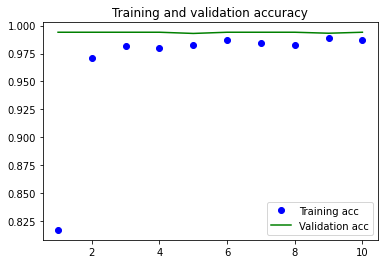

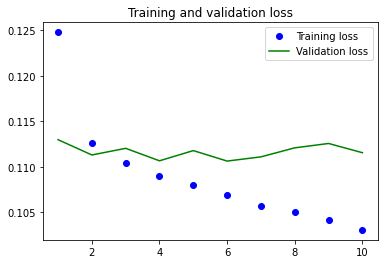

In [ ]:
import matplotlib.pyplot as plt
make_history_plot(historyDL)